<br />
<center><font size='6px' color='#mmvvbb'><b>Tweets Classification</b></font>
<br />

## Installation 

In [14]:
!pip install tweepy

Tweepy is a Python wrapper for the Twitter API. It accesses Twitter REST APIs (including Search) and Stream.

In [15]:
!pip install spacy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


spaCy is an open-source software library for advanced natural language processing.Designed to build information extraction or natural language understanding systems.

In [22]:
!pip install wordcloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

In [23]:
!pip install stylecloud

  Created wheel for stylecloud: filename=stylecloud-0.5.1-py3-none-any.whl size=259511 sha256=cff1f17f863bb7925900f0cda756f055552bb7a437bcfbe6e8b7e7b26ff832a1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\5f\75\38\ca23ebd183d03fdc639c9966ec0b46caaf441c7fb84e1a8da1
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111010 sha256=2eacfe9593c793151b94bf08a0dfeb8313d99c7189e46640084f79ae69788d33
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\35\a0\e2\7c4d0cd36f74f5ca64306f2553b3438af7d158e359a17e8382
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43947 sha256=7f876417e7ae333e16f69324de56b0c748fdad14f6794fb783dcfaf1b229ce09
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\9a\9e\46\42a1ce4dca43c6b8e0c7ac03eb210872a90fce30f1bd82fa3b
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=104c8ba0e9c4a022664c744e04ddbcec8e1958cac25b75f206aa4aed6cedf5cd
 

stylecloud is a python package that leverages the popular word_cloud package, adding useful features to create truly unique word clouds! Icon shapes (of any size!) for wordclouds

## Import libraries

In [2]:
import pandas as pd
import spacy
import en_core_web_sm
import tweepy
import os
import numpy as np
import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
import glob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer ,TfidfTransformer  
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## The twitter API authorization

In [4]:
consumer_key = "2efcnJkOeJIxOJwUXUgLwB3kt"
consumer_secret = "54NM4oJE1CKY6hizIUkS3qeKAmrtokXVOdGHMAy6l90UbGlqUb"
access_token = "1325789903142211593-4cpFSFq3HYHgwiDs3CqgJu7hucWynK"
access_token_secret = "z8lC2xyIbaQYqDgpSPaOXcMLZIzLi10iuoweMRYHqIpUl"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#public_tweets = api.home_timeline()
#for tweet in public_tweets:
#    print(tweet.text)


In [5]:
user = api.get_user('twitter')

In [6]:
print(user.screen_name)
print(user.followers_count)
for friend in user.friends():
   print(friend.screen_name)

Twitter
58721216
angnickelodeon


## Tweets backup

In [33]:
filename = 'Datasets/twitter_data_analysis2'+(datetime.datetime.now().strftime("%Y-%m-%d-%H"))+'.csv'
with open (filename, 'a+', newline='',encoding="utf-8") as csvFile:
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['date', 'TweetId','Tweet','created_at','location'])
    #using tweepy Cursor
    #for tweet in tweepy.Cursor(api.search, q='universalhealthcare', lang = 'en', count=1000).items():
    for tweet in tweepy.Cursor(api.user_timeline , id="twitter").items(10000):
    #writing a csv file
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        #csvWriter.writerow([tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count, tweet.retweet_count, tweet.entities, tweet.lang])
        csvWriter.writerow([datetime.datetime.now().strftime("%Y-%m-%d  %H:%M"), tweet.id, tweets_decoded, tweet.created_at, tweet._json["user"]["location"]])

## Dataset concatenation 

In [6]:
os.chdir('Datasets')
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# combine all files in the list
combined_csv = pd.concat(([pd.read_csv(f) for f in all_filenames]))

# export to csv
combined_csv.to_csv("dataset.csv", index=False, header=None, encoding='utf-8')

## Dataset demension resize

In [20]:
dummy_file = 'Datasets/dataset' + '10000.csv'
# Open original file in read only mode and dummy file in write mode
with open('Datasets/dataset.csv', 'r' , encoding='utf-8') as read_obj, open(dummy_file, 'w', encoding='utf-8') as write_obj:
    # Line by line copy data from original file to dummy file
    i=0
    for line in read_obj:
        if i <= 10001:
            i=i+1
            write_obj.write(line)

## Load dataset from csv file

In [21]:
def load_data():
    data = pd.read_csv('Datasets/dataset.csv')
    return data

In [22]:
tweet_df = load_data()
tweet_df.head()

,date,TweetId,Tweet,created_at,location
0,2020-11-19 19:31,1329474353705136138,RT @AgapeLoveAllDay: Why am I on fire this mor...,2020-11-19 17:19:21,A dock on a lake in Michigan.
1,2020-11-19 19:31,1329448623734738944,@nyctaxicabtales\nCouple From #Wisconsin Said:...,2020-11-19 15:37:06,New York City
2,2020-11-19 19:31,1329443503374553089,@KamalaHarris @JoeBiden \nI know #UniversalHea...,2020-11-19 15:16:45,Wakanda
3,2020-11-19 19:31,1329434910315175936,Why am I on fire this morning? I am tired of w...,2020-11-19 14:42:36,Wakanda
4,2020-11-19 19:31,1329433754830565384,RT @AgapeLoveAllDay: I don't do what I do for ...,2020-11-19 14:38:01,"Cincinnati, Ohio"


## Structure

#### Display the size of the dataset 
(number of rows and number of columns)

In [23]:
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (14150, 5)
Columns are: Index(['date', 'TweetId', 'Tweet', 'created_at', 'location'], dtype='object')


#### Display the dataset informations

In [24]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        14150 non-null  object
 1   TweetId     14150 non-null  object
 2   Tweet       14150 non-null  object
 3   created_at  14150 non-null  object
 4   location    13824 non-null  object
dtypes: object(5)
memory usage: 552.9+ KB


#### Create dataframe 

In [25]:
df  = pd.DataFrame(tweet_df[['TweetId', 'Tweet']])

## Pre-processing text data

Most of the text data are cleaned by following below steps.
1. Remove punctuations
2. Delete emojis
3. Tokenization - Converting a sentence into list of words
4. Remove stopwords
5. Lammetization/stemming - Tranforming any form of a word to its root word

#### 1. Remove punctuations

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['Tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,TweetId,Tweet,Tweet_punct
0,1329474353705136138,RT @AgapeLoveAllDay: Why am I on fire this mor...,RT AgapeLoveAllDay Why am I on fire this morni...
1,1329448623734738944,@nyctaxicabtales\nCouple From #Wisconsin Said:...,nyctaxicabtales\nCouple From Wisconsin Said Th...
2,1329443503374553089,@KamalaHarris @JoeBiden \nI know #UniversalHea...,KamalaHarris JoeBiden \nI know UniversalHealth...
3,1329434910315175936,Why am I on fire this morning? I am tired of w...,Why am I on fire this morning I am tired of wa...
4,1329433754830565384,RT @AgapeLoveAllDay: I don't do what I do for ...,RT AgapeLoveAllDay I dont do what I do for pra...
5,1329433466375692298,I don't do what I do for praise or accolades. ...,I dont do what I do for praise or accolades I ...
6,1329429029661892608,"RT @AgapeLoveAllDay: The point is, we need to ...",RT AgapeLoveAllDay The point is we need to be ...
7,1329424242576928768,@axlsgirl13 This is what I see regularly as an...,axlsgirl This is what I see regularly as an on...
8,1329422168430694401,RT @AgapeLoveAllDay: I want to speak to @JoeBi...,RT AgapeLoveAllDay I want to speak to JoeBiden...
9,1329417031079374848,I want to speak to @JoeBiden and @KamalaHarris...,I want to speak to JoeBiden and KamalaHarris f...


#### 2. Delete emojis

In [28]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text= emoji_pattern.sub(r'', text)
    return text
df['Tweet_emoji']= df['Tweet_punct'].apply(lambda x: remove_emoji(x))
df.head(10)

,TweetId,Tweet,Tweet_punct,Tweet_emoji
0,1329474353705136138,RT @AgapeLoveAllDay: Why am I on fire this mor...,RT AgapeLoveAllDay Why am I on fire this morni...,RT AgapeLoveAllDay Why am I on fire this morni...
1,1329448623734738944,@nyctaxicabtales\nCouple From #Wisconsin Said:...,nyctaxicabtales\nCouple From Wisconsin Said Th...,nyctaxicabtales\nCouple From Wisconsin Said Th...
2,1329443503374553089,@KamalaHarris @JoeBiden \nI know #UniversalHea...,KamalaHarris JoeBiden \nI know UniversalHealth...,KamalaHarris JoeBiden \nI know UniversalHealth...
3,1329434910315175936,Why am I on fire this morning? I am tired of w...,Why am I on fire this morning I am tired of wa...,Why am I on fire this morning I am tired of wa...
4,1329433754830565384,RT @AgapeLoveAllDay: I don't do what I do for ...,RT AgapeLoveAllDay I dont do what I do for pra...,RT AgapeLoveAllDay I dont do what I do for pra...
5,1329433466375692298,I don't do what I do for praise or accolades. ...,I dont do what I do for praise or accolades I ...,I dont do what I do for praise or accolades I ...
6,1329429029661892608,"RT @AgapeLoveAllDay: The point is, we need to ...",RT AgapeLoveAllDay The point is we need to be ...,RT AgapeLoveAllDay The point is we need to be ...
7,1329424242576928768,@axlsgirl13 This is what I see regularly as an...,axlsgirl This is what I see regularly as an on...,axlsgirl This is what I see regularly as an on...
8,1329422168430694401,RT @AgapeLoveAllDay: I want to speak to @JoeBi...,RT AgapeLoveAllDay I want to speak to JoeBiden...,RT AgapeLoveAllDay I want to speak to JoeBiden...
9,1329417031079374848,I want to speak to @JoeBiden and @KamalaHarris...,I want to speak to JoeBiden and KamalaHarris f...,I want to speak to JoeBiden and KamalaHarris f...


#### 3. Tokenization

In [29]:
def tokenization(text):
    text = re.split(' ', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,TweetId,Tweet,Tweet_punct,Tweet_emoji,Tweet_tokenized
0,1329474353705136138,RT @AgapeLoveAllDay: Why am I on fire this mor...,RT AgapeLoveAllDay Why am I on fire this morni...,RT AgapeLoveAllDay Why am I on fire this morni...,"[rt, agapeloveallday, why, am, i, on, fire, th..."
1,1329448623734738944,@nyctaxicabtales\nCouple From #Wisconsin Said:...,nyctaxicabtales\nCouple From Wisconsin Said Th...,nyctaxicabtales\nCouple From Wisconsin Said Th...,"[nyctaxicabtales\ncouple, from, wisconsin, sai..."
2,1329443503374553089,@KamalaHarris @JoeBiden \nI know #UniversalHea...,KamalaHarris JoeBiden \nI know UniversalHealth...,KamalaHarris JoeBiden \nI know UniversalHealth...,"[kamalaharris, joebiden, \ni, know, universalh..."
3,1329434910315175936,Why am I on fire this morning? I am tired of w...,Why am I on fire this morning I am tired of wa...,Why am I on fire this morning I am tired of wa...,"[why, am, i, on, fire, this, morning, i, am, t..."
4,1329433754830565384,RT @AgapeLoveAllDay: I don't do what I do for ...,RT AgapeLoveAllDay I dont do what I do for pra...,RT AgapeLoveAllDay I dont do what I do for pra...,"[rt, agapeloveallday, i, dont, do, what, i, do..."


#### 4. Remove stopwords

In [30]:
stopword = nltk.corpus.stopwords.words('english')

In [31]:
stopword.extend(['old', 'new', 'age', 'lot', 'bag', 'top', 'cat', 'bat', 'sap', 'jda', 'tea', 'dog', 'lie', 'law', 'lab',\
             'mob', 'map', 'car', 'fat', 'sea', 'saw', 'raw', 'rob', 'win', 'can', 'get', 'fan', 'fun', 'big',\
             'use', 'pea', 'pit','pot', 'pat', 'ear', 'eye', 'kit', 'pot', 'pen', 'bud', 'bet', 'god', 'tax', 'won', 'run',\
              'lid', 'log', 'pr', 'pd', 'cop', 'nyc', 'ny', 'la', 'toy', 'war', 'law', 'lax', 'jfk', 'fed', 'cry', 'ceo',\
              'pay', 'pet', 'fan', 'fun', 'usd', 'rio',':)', ';)', '(:', '(;', '}', '{','}','here', 'there', 'where', 'when', 'would', 'should', 'could','thats', 'youre', 'thanks', 'hasn',\
             'thank', 'https', 'since', 'wanna', 'gonna', 'aint', 'http', 'unto', 'onto', 'into', 'havent',\
             'dont', 'done', 'cant', 'werent', 'https', 'u', 'isnt', 'go', 'theyre', 'each', 'every', 'shes', 'youve', 'youll',\
            'weve', 'theyve','googleele' , 'goog', 'lyin', 'lie', 'googles', 'goog', 'aapl','apple',\
             'msft','microsoft', 'google', 'goog', 'googl','goog'])

In [32]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,TweetId,Tweet,Tweet_punct,Tweet_emoji,Tweet_tokenized,Tweet_nonstop
0,1329474353705136138,RT @AgapeLoveAllDay: Why am I on fire this mor...,RT AgapeLoveAllDay Why am I on fire this morni...,RT AgapeLoveAllDay Why am I on fire this morni...,"[rt, agapeloveallday, why, am, i, on, fire, th...","[rt, agapeloveallday, fire, morning, tired, wa..."
1,1329448623734738944,@nyctaxicabtales\nCouple From #Wisconsin Said:...,nyctaxicabtales\nCouple From Wisconsin Said Th...,nyctaxicabtales\nCouple From Wisconsin Said Th...,"[nyctaxicabtales\ncouple, from, wisconsin, sai...","[nyctaxicabtales\ncouple, wisconsin, said, rep..."
2,1329443503374553089,@KamalaHarris @JoeBiden \nI know #UniversalHea...,KamalaHarris JoeBiden \nI know UniversalHealth...,KamalaHarris JoeBiden \nI know UniversalHealth...,"[kamalaharris, joebiden, \ni, know, universalh...","[kamalaharris, joebiden, \ni, know, universalh..."
3,1329434910315175936,Why am I on fire this morning? I am tired of w...,Why am I on fire this morning I am tired of wa...,Why am I on fire this morning I am tired of wa...,"[why, am, i, on, fire, this, morning, i, am, t...","[fire, morning, tired, watching, people, suffe..."
4,1329433754830565384,RT @AgapeLoveAllDay: I don't do what I do for ...,RT AgapeLoveAllDay I dont do what I do for pra...,RT AgapeLoveAllDay I dont do what I do for pra...,"[rt, agapeloveallday, i, dont, do, what, i, do...","[rt, agapeloveallday, praise, accolades, tell,..."
5,1329433466375692298,I don't do what I do for praise or accolades. ...,I dont do what I do for praise or accolades I ...,I dont do what I do for praise or accolades I ...,"[i, dont, do, what, i, do, for, praise, or, ac...","[praise, accolades, tell, stories, reasons, sa..."
6,1329429029661892608,"RT @AgapeLoveAllDay: The point is, we need to ...",RT AgapeLoveAllDay The point is we need to be ...,RT AgapeLoveAllDay The point is we need to be ...,"[rt, agapeloveallday, the, point, is, we, need...","[rt, agapeloveallday, point, need, less, selfi..."
7,1329424242576928768,@axlsgirl13 This is what I see regularly as an...,axlsgirl This is what I see regularly as an on...,axlsgirl This is what I see regularly as an on...,"[axlsgirl, this, is, what, i, see, regularly, ...","[axlsgirl, see, regularly, oncology, nurse, si..."
8,1329422168430694401,RT @AgapeLoveAllDay: I want to speak to @JoeBi...,RT AgapeLoveAllDay I want to speak to JoeBiden...,RT AgapeLoveAllDay I want to speak to JoeBiden...,"[rt, agapeloveallday, i, want, to, speak, to, ...","[rt, agapeloveallday, want, speak, joebiden, k..."
9,1329417031079374848,I want to speak to @JoeBiden and @KamalaHarris...,I want to speak to JoeBiden and KamalaHarris f...,I want to speak to JoeBiden and KamalaHarris f...,"[i, want, to, speak, to, joebiden, and, kamala...","[want, speak, joebiden, kamalaharris, face, fa..."


#### 5. Stemming and Lammitization
Ex - developed, development

In [33]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,TweetId,Tweet,Tweet_punct,Tweet_emoji,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,1329474353705136138,RT @AgapeLoveAllDay: Why am I on fire this mor...,RT AgapeLoveAllDay Why am I on fire this morni...,RT AgapeLoveAllDay Why am I on fire this morni...,"[rt, agapeloveallday, why, am, i, on, fire, th...","[rt, agapeloveallday, fire, morning, tired, wa...","[rt, agapeloveallday, fire, morn, tire, watch,..."
1,1329448623734738944,@nyctaxicabtales\nCouple From #Wisconsin Said:...,nyctaxicabtales\nCouple From Wisconsin Said Th...,nyctaxicabtales\nCouple From Wisconsin Said Th...,"[nyctaxicabtales\ncouple, from, wisconsin, sai...","[nyctaxicabtales\ncouple, wisconsin, said, rep...","[nyctaxicabtales\ncoupl, wisconsin, said, repu..."
2,1329443503374553089,@KamalaHarris @JoeBiden \nI know #UniversalHea...,KamalaHarris JoeBiden \nI know UniversalHealth...,KamalaHarris JoeBiden \nI know UniversalHealth...,"[kamalaharris, joebiden, \ni, know, universalh...","[kamalaharris, joebiden, \ni, know, universalh...","[kamalaharri, joebiden, \ni, know, universalhe..."
3,1329434910315175936,Why am I on fire this morning? I am tired of w...,Why am I on fire this morning I am tired of wa...,Why am I on fire this morning I am tired of wa...,"[why, am, i, on, fire, this, morning, i, am, t...","[fire, morning, tired, watching, people, suffe...","[fire, morn, tire, watch, peopl, suffer, even,..."
4,1329433754830565384,RT @AgapeLoveAllDay: I don't do what I do for ...,RT AgapeLoveAllDay I dont do what I do for pra...,RT AgapeLoveAllDay I dont do what I do for pra...,"[rt, agapeloveallday, i, dont, do, what, i, do...","[rt, agapeloveallday, praise, accolades, tell,...","[rt, agapeloveallday, prais, accolad, tell, st..."


In [34]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,TweetId,Tweet,Tweet_punct,Tweet_emoji,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1329474353705136138,RT @AgapeLoveAllDay: Why am I on fire this mor...,RT AgapeLoveAllDay Why am I on fire this morni...,RT AgapeLoveAllDay Why am I on fire this morni...,"[rt, agapeloveallday, why, am, i, on, fire, th...","[rt, agapeloveallday, fire, morning, tired, wa...","[rt, agapeloveallday, fire, morn, tire, watch,...","[rt, agapeloveallday, fire, morning, tired, wa..."
1,1329448623734738944,@nyctaxicabtales\nCouple From #Wisconsin Said:...,nyctaxicabtales\nCouple From Wisconsin Said Th...,nyctaxicabtales\nCouple From Wisconsin Said Th...,"[nyctaxicabtales\ncouple, from, wisconsin, sai...","[nyctaxicabtales\ncouple, wisconsin, said, rep...","[nyctaxicabtales\ncoupl, wisconsin, said, repu...","[nyctaxicabtales\ncouple, wisconsin, said, rep..."
2,1329443503374553089,@KamalaHarris @JoeBiden \nI know #UniversalHea...,KamalaHarris JoeBiden \nI know UniversalHealth...,KamalaHarris JoeBiden \nI know UniversalHealth...,"[kamalaharris, joebiden, \ni, know, universalh...","[kamalaharris, joebiden, \ni, know, universalh...","[kamalaharri, joebiden, \ni, know, universalhe...","[kamalaharris, joebiden, \ni, know, universalh..."
3,1329434910315175936,Why am I on fire this morning? I am tired of w...,Why am I on fire this morning I am tired of wa...,Why am I on fire this morning I am tired of wa...,"[why, am, i, on, fire, this, morning, i, am, t...","[fire, morning, tired, watching, people, suffe...","[fire, morn, tire, watch, peopl, suffer, even,...","[fire, morning, tired, watching, people, suffe..."
4,1329433754830565384,RT @AgapeLoveAllDay: I don't do what I do for ...,RT AgapeLoveAllDay I dont do what I do for pra...,RT AgapeLoveAllDay I dont do what I do for pra...,"[rt, agapeloveallday, i, dont, do, what, i, do...","[rt, agapeloveallday, praise, accolades, tell,...","[rt, agapeloveallday, prais, accolad, tell, st...","[rt, agapeloveallday, praise, accolade, tell, ..."


In [35]:
df.Tweet_lemmatized

0        [rt, agapeloveallday, fire, morning, tired, wa...
1        [nyctaxicabtales\ncouple, wisconsin, said, rep...
2        [kamalaharris, joebiden, \ni, know, universalh...
3        [fire, morning, tired, watching, people, suffe...
4        [rt, agapeloveallday, praise, accolade, tell, ...
                               ...                        
14145       [themegaboi, keeping, brain, thinking, around]
14146    [guillaumetc, hamillhimself, chrisevans, combo...
14147                          [ksjize, hi, dogrates, got]
14148               [insomniacookies, cc, mecookiemonster]
14149    [mnoir, amp, guaranteed, good, morning, good, ...
Name: Tweet_lemmatized, Length: 14150, dtype: object

In [36]:
df.Tweet_lemmatized.to_csv('Datasets/new_tweets_clean.csv',index = False)

In [37]:
# remove the hashtags, mentions and unwanted characters.
new_tweet_df= pd.read_csv('Datasets/new_tweets_clean.csv')
print('Dataset size:',new_tweet_df.shape)
print('Columns are:',new_tweet_df.columns)
new_tweet_df.info()
new_tweet_df.head()

Dataset size: (14150, 1)
Columns are: Index(['Tweet_lemmatized'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tweet_lemmatized  14150 non-null  object
dtypes: object(1)
memory usage: 110.7+ KB


,Tweet_lemmatized
0,"['rt', 'agapeloveallday', 'fire', 'morning', '..."
1,"['nyctaxicabtales\ncouple', 'wisconsin', 'said..."
2,"['kamalaharris', 'joebiden', '\ni', 'know', 'u..."
3,"['fire', 'morning', 'tired', 'watching', 'peop..."
4,"['rt', 'agapeloveallday', 'praise', 'accolade'..."


In [38]:
cv = CountVectorizer()
X=cv.fit_transform(new_tweet_df.Tweet_lemmatized)
print(X)

  (0, 6028)	1
  (0, 109)	1
  (0, 2142)	1
  (0, 4727)	1
  (0, 7058)	1
  (0, 7496)	1
  (0, 5419)	1
  (0, 6708)	1
  (0, 1956)	1
  (0, 1769)	1
  (0, 5464)	1
  (0, 5341)	1
  (0, 4142)	1
  (1, 5202)	1
  (1, 4873)	1
  (1, 7596)	1
  (1, 6062)	1
  (1, 5898)	1
  (1, 7443)	1
  (1, 3839)	1
  (1, 3941)	1
  (1, 580)	1
  (1, 3329)	1
  (2, 7496)	1
  (2, 3839)	1
  :	:
  (14145, 369)	1
  (14145, 6995)	1
  (14145, 6944)	1
  (14146, 7528)	1
  (14146, 7243)	1
  (14146, 7559)	1
  (14146, 196)	1
  (14146, 2467)	1
  (14146, 2494)	1
  (14146, 1083)	1
  (14146, 1195)	1
  (14147, 2394)	1
  (14147, 2620)	1
  (14147, 1664)	1
  (14147, 4068)	1
  (14148, 4531)	1
  (14148, 980)	1
  (14148, 3604)	1
  (14149, 4727)	1
  (14149, 252)	1
  (14149, 2379)	2
  (14149, 7217)	1
  (14149, 5025)	1
  (14149, 4680)	1
  (14149, 2460)	1


## Tweets Classification

* We're going to use the K-Means algorithm to categorize Tweets into 30 classes

In [44]:
wcss=[]
for i in range(3,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 96155.000
Iteration  1, inertia 67310.171
Iteration  2, inertia 66855.202
Iteration  3, inertia 66853.450
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.131040e-08
Initialization complete
Iteration  0, inertia 95821.000
Iteration  1, inertia 67166.410
Converged at iteration 1: center shift 0.000000e+00 within tolerance 6.131040e-08
Initialization complete
Iteration  0, inertia 109333.000
Iteration  1, inertia 67003.093
Iteration  2, inertia 67000.026
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.131040e-08
Initialization complete
Iteration  0, inertia 95632.000
Iteration  1, inertia 67039.529
Iteration  2, inertia 67030.152
Iteration  3, inertia 66678.501
Iteration  4, inertia 65905.591
Iteration  5, inertia 65890.979
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.131040e-08
Initialization complete
Iteration  0, inertia 82061.000
Iteration  1, inertia 67481.672
Converg

#### Search for optimal clusters

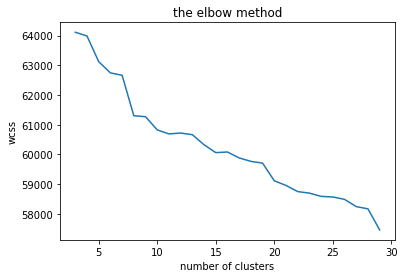

In [45]:
plt.plot(range(3,30),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

#### Drawing clusters

Initialization complete
Iteration  0, inertia 76687.000
Iteration  1, inertia 61295.281
Iteration  2, inertia 61135.719
Iteration  3, inertia 60806.183
Iteration  4, inertia 60557.463
Iteration  5, inertia 60297.384
Iteration  6, inertia 60241.010
Iteration  7, inertia 60240.817
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.131040e-08
Initialization complete
Iteration  0, inertia 79299.000
Iteration  1, inertia 63581.027
Iteration  2, inertia 63460.311
Iteration  3, inertia 63453.855
Iteration  4, inertia 63449.320
Iteration  5, inertia 63446.415
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.131040e-08
Initialization complete
Iteration  0, inertia 88258.000
Iteration  1, inertia 59941.675
Iteration  2, inertia 59914.125
Iteration  3, inertia 59908.873
Iteration  4, inertia 59903.042
Iteration  5, inertia 59899.117
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.131040e-08
Initialization complete
Iteration  0, iner

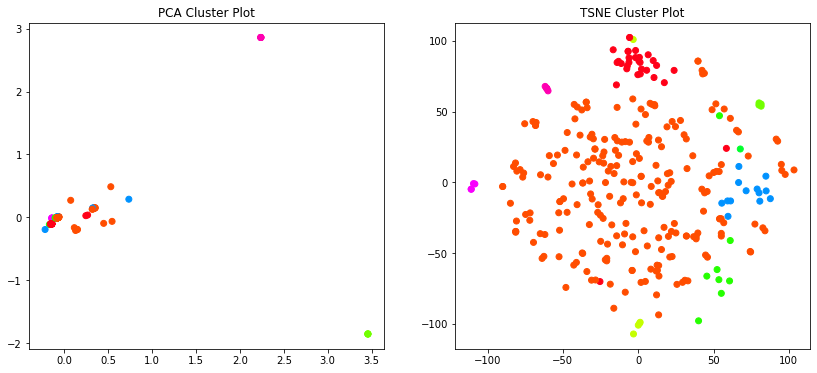

In [47]:
clusters = KMeans(n_clusters=20,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True).fit_predict(X)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=8000, replace=False) 
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X, clusters)

In [53]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Key Keywords

In [54]:
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    print("-----------------------")
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
-----------------------
 universalhealthcare
 rt
 medicareforall
 support
 joebiden
 wholewashington
 american
 singlepayer
 need
 ossoff

Cluster 1:
-----------------------
 make
 list
 tweet
 sure
 first
 let
 better
 happen
 lead
 want

Cluster 2:
-----------------------
 work
 like
 well
 change
 rt
 often
 pressure
 glove
 email
 look

Cluster 3:
-----------------------
 smartdissent
 insurance
 health
 obamacare
 american
 icymi
 trump
 rt
 httpstcoazppibumz
 lost

Cluster 4:
-----------------------
 timeline
 like
 looking
 love
 putting
 day
 truly
 today
 libbyexotic
 septuplets

Cluster 5:
-----------------------
 better
 tell
 aca
 rt
 finger
 program
 never
 deeply
 people
 crossed

Cluster 6:
-----------------------
 live
 communist
 affordable
 radical
 simply
 ca
 healthcare
 darrellissa
 one
 wanting

Cluster 7:
-----------------------
 debt
 take
 dy
 mean
 american
 average
 nhttpstcocxnteynyvh
 nwe
 strive
 rt

Cluster 8:
-----------

## Single tweet per cluster 
* We chose to display the original tweet without any changes 

In [84]:
i=0
j=0
while i<30:
    while True: 
        Y=cv.transform([new_tweet_df.Tweet_lemmatized[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("")
            print("Tweet of cluster "+str(prediction)+ " :   " +df.Tweet[i])
            print("_________________________________________________________________________________")
            j=0
            break
        j+=1
    i+=1


Tweet of cluster [0]:rt @agapeloveallday: fire morning? tired watching people suffer. even can't ease physical pain, le…
_________________________________________________________________________________

Tweet of cluster [1]:@nyctaxicabtales couple #wisconsin said: #republicans voted @joebiden @kamalaharris because… https://t.co/xnnub2s88r
_________________________________________________________________________________

Tweet of cluster [2]:@kamalaharris @joebiden know #universalhealthcare something think america wants. rn watching,… https://t.co/xqk55h2tqm
_________________________________________________________________________________

Tweet of cluster [3]:fire morning? tired watching people suffer. even can't ease physical pain, at… https://t.co/udxtmrskf5
_________________________________________________________________________________

Tweet of cluster [4]:rt @agapeloveallday: praise accolades. tell story reasons. say becaus…
____________________________________________________

## Tweets by category

#### Sets of words
* The block below represents words related to the economy, social, culture and felt.

In [64]:
economy_related_words = '''agriculture infrastructure capitalism trading service sector technology  economical supply industrialism efficiency frugality retrenchment downsizing credit debit value economize save economically economies sluggish rise rising spending conserve trend low-management decline industry impact poor profession surplus fall declining accelerating interest sectors balance stability productivity increase rates pushing expanding stabilize  rate industrial borrowing struggling deficit predicted increasing data economizer analysts investment market-based economy debt free enterprise medium  exchange metric savepoint scarcity capital bank company stockholder fund business asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics  bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter distribution downturn economist'''

In [65]:
social_related_words = '''sociable, gregarious societal friendly society socialization political sociality interpersonal ethnic socially party welfare public community socialist societies development network humans socialism collective personal corporation social constructivism relations volition citizenship brute attitude rights socio socioeconomic ethics civic communal marital sociale socialized communities policy unions institutions values governmental organizations jamboree festivity fairness support care sides activism unsocial psychosocial socializing psychological distributional demographic participation reunion partygoer partyism festive power network gala housewarming celebration counterparty social-war particularist interactional ideational asocial'''

In [66]:
culture_related_words = ''' ethnicity heritage modernity spirituality marxismmaterial culture ethos nationality humanism romanticism civilisation traditionalism genetics kinship heredity marriage indigenous archeology acculturate ontogenesis viniculture modern clothes rooted cicero societies history roots influence geography historical folk origins phenomenon teleology ancient aspects perspective liberalism nowadays community style unique prevalent describes today  origin   modernity beliefs  genre barbarian ethnic  colonization cultural universal organization western-civilization structuralism  culture  heathen pagan transculturation culture peasant classicist nativism anarchy ungrown philosophic cult consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism mongolian cosmopolitan epistemology lifestyles diversity chauvinism westernization materialism vernacular homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse puritanism modernism intellectualism  exclusiveness elitism  colonialism pentecostalism paganism nationwide expansion rural auxesis kimono culturize alethophobia nettlebed japanification  dongyi clannishness insularity hybridity westernisation foreignness worldview exclusionism enculturation ethnocentrism confucianist vulgarization shintoism  westernism denominationalism deracination eurocentrism cosmologies  emotiveness bohemianism territorialism philosophical-doctrine ethnic minority social-darwinism  theory cultural evolution belief systemfolk music traditional art house karl-marx theorymedia film-theory art history museum studies cultural artifact'''

In [67]:
health_related_words = '''disease obesity world health organization medicine nutrition well-being exercise welfare wellness health care public health nursing stress safety hygiene research social healthy condition aids epidemiology healthiness wellbeing care illness medical dieteducation infectious disease environmental healthcare physical fitness hospitals health care provider doctors healthy community design insurance sanitation human body patient mental health medicare agriculture health science fitnesshealth policy  weight loss physical therapy psychology pharmacy metabolic organism human lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family eudaimonia eudaemonia air house prevention genetics public families poor needs treatment communicable disease study protection malaria development food priority management healthful mental provide department administration programs help assistance funding environment improving emergency need program affected schools private mental illness treat diseases preparedness perinatal fertility sickness veterinary sanitary pharmacists behavioral midwives gerontology infertility hospitalization midwifery cholesterol childcare pediatrician pediatrics medicaid asthma pensions sicknesses push-up physical education body-mass-index eat well gymnastic apparatus tune up good morning bathing low blood-pressure heart attack health club ride-bike you feel good eczema urticaria dermatitis sunburn overwork manufacturing medical sociology need exercise run'''

In [68]:
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(nltk.corpus.stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
            word1 = lemmatizer.lemmatize(i) 
            final_text.append(word1.lower())
    return " ".join(final_text)
df.Tweet = df.Tweet.apply(furnished)

Pre-processing of the sets of words

In [69]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

Remove duplicates 

In [70]:
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health
string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'ethnicity heritage modernity spirituality marxismmaterial culture ethos nationality humanism romanticism civilisation traditionalism genetics kinship heredity marriage indigenous archeology acculturate ontogenesis viniculture modern clothes rooted cicero society history root influence geography historical folk origin phenomenon teleology ancient aspect perspective liberalism nowadays community style unique prevalent describes today belief genre barbarian ethnic colonization cultural universal organization western-civilization structuralism heathen pagan transculturation peasant classicist nativism anarchy ungrown philosophic cult consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism mongolian cosmopolitan epistemology lifestyle diversity chauvinism westernization materialism vernacular homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse puritanism modernism intellectualism exclusiveness elitism 

In [72]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores
e_scores = get_scores(economy, df.Tweet.to_list())
s_scores = get_scores(social, df.Tweet.to_list())
c_scores = get_scores(culture, df.Tweet.to_list())
h_scores = get_scores(health, df.Tweet.to_list())

In [73]:
# create a jaccard scored df.
data  = {'names':df.TweetId.to_list(),       'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
#assign classes based on highest score
def get_classes(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()
econ, socio, cul, heal = get_classes(l1, l2, l3, l4)
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
class_df = pd.DataFrame(data)
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()
#add a new totals column
new_groups_df['total'] = new_groups_df['health'] + new_groups_df['culture'] + new_groups_df['social'] +  new_groups_df['economic']
#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()  

In [74]:
scores_df

,names,economic_score,social_score,culture_score,health_scores
0,1329474353705136138,0.600000,0.666667,0.600000,0.636364
1,1329448623734738944,0.638889,0.611111,0.638889,0.628571
2,1329443503374553089,0.648649,0.621622,0.648649,0.594595
3,1329434910315175936,0.638889,0.657143,0.638889,0.676471
4,1329433754830565384,0.562500,0.580645,0.562500,0.600000
...,...,...,...,...,...
14145,1147225147230904321,0.500000,0.516129,0.500000,0.533333
14146,1147223872326029314,0.612903,0.689655,0.612903,0.655172
14147,1147222590580305921,0.533333,0.551724,0.533333,0.517241
14148,1147222445381865472,0.400000,0.413793,0.400000,0.428571


In [75]:
new_groups_df

,economic,social,culture,health,total
name,,,,,
1147221416779157504,0,0,0,4,4
1147222445381865472,0,0,0,4,4
1147222590580305921,0,4,0,0,4
1147223872326029314,0,4,0,0,4
1147225147230904321,0,0,0,4,4
...,...,...,...,...,...
1338602685105377282,0,0,0,3,3
1338690093113077765,0,0,0,3,3
1339350208942125066,1,0,1,0,2


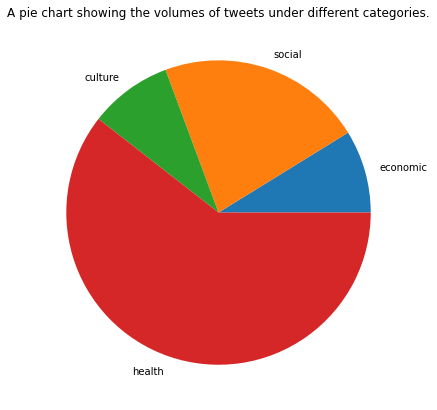

In [76]:
fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()

In [80]:
conda install -c conda-forge watermark

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - watermark


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    watermark-2.1.0            |     pyhd8ed1ab_0           9 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38
  watermark          conda-forge/noarch::watermark-2.1.0-pyhd8ed1ab_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-

In [83]:
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
seaborn       : 0.10.1
tweepy        : 3.9.0
re            : 2.2.1
csv           : 1.0
pandas        : 1.0.5
nltk          : 3.5
numpy         : 1.18.5
en_core_web_sm: 2.3.1
spacy         : 2.3.2
matplotlib    : 3.2.2

